In [1]:
from IPython.core.display import HTML  #For a more pleasing rendering...
HTML(open("styles/custom.css").read()) #When run in your local notebook.

# (Deep) Q Networks

<font> A good (and simple) problem for Q-Learning is the FrozenLake environment. The objective of this game is to cross a frozen lake from $(S)$ to $(G)$. However, not the whole lake is frozen $(F)$ yet, there are some holes $(H)$. 
To make this game harder, a wind blows the player in any direction from time to time. 
For this environment, the Q-Learning is the better strategy as it takes the wind into account.
The agent now has to learn to find a way from $(S)$ to $(G)$. It can chose between the four actions up, down, left, and right. The reward is only given at the very end, when the agents reaches $(G)$.</font>

<img src="./images/FrozenLake.PNG" width=400/>

## Q-Tables

<font>As you can see in the picture above, we have 4x4 possible states.
In each of these states, the agent can decide between 4 actions, resulting into a 16x4 Q-Table (16 state lines and 4 actions columns). We start with initializing the Q-table with all zeroes, and updating it accordingly to the rewards given over time.
$$ $$
For updating our Q-table we use the Bellman equation.
This equation states, that the expected final reward is equal to the immediate reward from the current action combined with the expected reward from the best future action taken at the following state. The parameter y is a discount variable. It allows us to decide how much influence the possible future rewards ought to have compared to the prestent reward. 
By updating in this way, the table slowly begins to obtain accurate measures of the expected future reward for a given action in a given state. 
$$ $$
<center>Eq 1. $Q(s,a) = r + γ(max(Q(s’,a’))$ </font>

### Q-Table Learning Code

First, we need to import a few things.

In [1]:
import gym # Load the OpenAI Gym
import numpy as np # NumPy is the fundamental package for scientific computing with Python

env = gym.make('FrozenLake-v0') # Load the enviroment

[2017-09-22 11:08:57,210] Making new env: FrozenLake-v0


Now, we can implement the algorithm. 

In [15]:
# j =  number of steps
# lr = learning rate
# y = discount variable
# s = state
# r = rewards
# d = done-Bit
# a = action


# Initialize table with all zeros with the right dimensions
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters 
# You can play around with them if you want. 
# The best in our case were: learning_rate= .8, y=.95, and num_episodes=2000
lr = .8
y = .95
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
jList = [] # StepList
rList = [] # RewardList

# Go through your episodes
for i in range(num_episodes): 
    s = env.reset() # Reset environment and get first new observation
    rSum = 0 # Reset reward sum
    d = False # Reset the done-Bit
    j = 0 # Reset number of steps
    
    # The Q-Table learning algorithm
    while j < 99:
        j+=1 
        # Choose an action by greedily picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        # Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        # Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rSum += r
        s = s1
        if d == True: # Are we done?
            break
    jList.append(j)
    rList.append(rSum)

In [16]:
print "Final Q-Table Values: \n"
print Q

Final Q-Table Values: 

[[  2.19803186e-01   1.11506483e-02   6.07465281e-03   1.39243329e-03]
 [  0.00000000e+00   1.25383087e-03   1.29681141e-03   1.57496428e-01]
 [  1.08148574e-01   3.63110963e-04   2.27412733e-03   0.00000000e+00]
 [  8.78259523e-06   2.45722606e-03   9.38829145e-06   0.00000000e+00]
 [  3.62448302e-01   1.45889548e-03   3.46049598e-04   3.31631954e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.60871473e-02   1.45111347e-06   2.46350444e-05   2.34747909e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.76364561e-04   3.04297410e-03   3.19149583e-01]
 [  3.21614751e-04   5.85274413e-01   0.00000000e+00   0.00000000e+00]
 [  3.92597888e-01   2.56844701e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.01027645e-04   0.00000000e+00   8.60240599e-01 

<font> Now we want to see our results. For this, we first need to include matplotlib.
It of interest to see how many rewards we got over time for each episode, as well as how many steps we took on average. If the agent actually learned something, we should see an increase.</font>

In [17]:
import matplotlib.pyplot as plt

Reward over time: 977.0
Average steps taken: 38


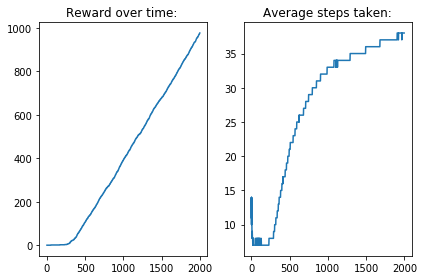

In [29]:
print "Reward over time: " +  str(sum(rList))
print "Average steps taken: " +  str(sum(jList)/num_episodes)


plt.subplot(1, 2, 1)
plt.title('Reward over time: ')
plt.plot(np.cumsum(rList))
plt.subplot(1, 2, 2)
plt.title('Average steps taken:')
plt.plot(np.cumsum(jList)[1:]/range(len(jList))[1:])
plt.tight_layout()

plt.show()

## Q-Network

<font> You may ask: 'But what about the real world? It is kind of hard to put it into a table.'
This is where Q-Networks come in. 
Q-Networks act as function approximators, so any possible state can be represented as a vector, which in turn can be used to map the Q-values.
$$ $$
In the case of the FrozenLake example, we will be using a one-layer network which takes the state encoded in a one-hot vector (1x16), and produces a vector of 4 Q-values, one for each action. Such a simple network acts kind of like a glorified table, with the network weights serving as the old cells. 
$$ $$
The key difference is that we can easily expand the Tensorflow network with added layers, activation functions, and different input types, whereas all that is impossible with a regular table. 
$$ $$
The method of updating is a little different as well. Instead of directly updating our table, with a network we will be using backpropagation and a loss function. 
$$ $$
As loss function we use the sum of squared of the errors (SSE). This loss function is a common choice. Here, the difference between the current predicted Q-values, and the “target” value is computed and the gradients passed through the network. Our Q-target for the chosen action is equivalent to the Q-value computed in Eq1. above.
$$ $$
<center> Eq2. $Loss = \sum(Q-target - Q)²$   </font>

### Q-Network Code


First, we need to import a few things.

In [32]:
import gym
import numpy as np
import random #random numbers
import tensorflow as tf #tensorflow

env = gym.make('FrozenLake-v0')

[2017-09-21 16:25:29,322] Making new env: FrozenLake-v0


Here we create the tensorflow graph.

In [33]:
tf.reset_default_graph()

# These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

# Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout)) # Loss function
trainer = tf.train.GradientDescentOptimizer(lr) 
updateModel = trainer.minimize(loss)

#### Actual algorithm 

In [34]:
# e = chance of random action
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = .1
lr = .1
num_episodes = 2000

#create lists to contain total rewards and steps per episode
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rSum = 0
        d = False
        j = 0
        
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rSum += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rSum)

Reward over time: 40.0
Average steps taken: 6


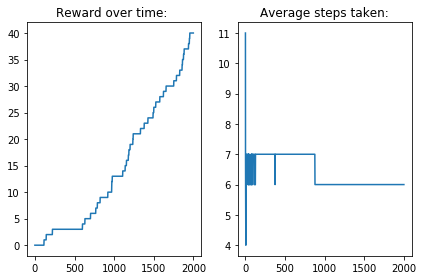

In [35]:
print "Reward over time: " +  str(sum(rList))
print "Average steps taken: " +  str(sum(jList)/num_episodes)


plt.subplot(1, 2, 1)
plt.title('Reward over time: ')
plt.plot(np.cumsum(rList))
plt.subplot(1, 2, 2)
plt.title('Average steps taken:')
plt.plot(np.cumsum(jList)[1:]/range(len(jList))[1:])
plt.tight_layout()

plt.show()

## Deep Q Network

<font> As you can see, networks are not necessarly better than Q-tables. However, if we add another layer and change our network into a deep Q network, it tends to work better than other solutions.
To do this, we need to:</font>

1. Change our single-layer network into a multi-layer convolutional network
    
2. Implement Experience Replay
    
3. Use a second “target” network

<font>The Experience Ray will allow our network to train itself with its own memories, while the second target network will compute the target Q-values during the updates.</font>

<font>Going from a single-layer network to a multi-layer convolutional network.
Implementing Experience Replay, which will allow our network to train itself using stored memories from it’s experience.
Utilizing a second “target” network, which we will use to compute target Q-values during our updates.</font>

#### Step 1. Change our single-layer network into a multi-layer convolutional network

<img src="./images/Deep-Q-layer.png" width=700/>

To construct a convolutional layer in TensorFlow see the [documentation](https://www.tensorflow.org/versions/r0.12/api_docs/python/contrib.layers/higher_level_ops_for_building_neural_network_layers_#convolution2d) for further information. 


#### Step 2. Implement Experience Replay

<font>As pointed out above, the Experience Replay allows the network to train from its experience. By storing the experience and drawing it randomly, we gain a more robust network. It is important to choose randomly as otherwise the data is highly correlated and we will likely overfit and fail to generalize. Each of these experiences are stored as a tuple of $e_t=(s_t,a_t,r_t,s_{t+1})$
$$ $$
An other point to consider is: Shoud we stick with a way that worked well, or try to find a better solution?
This is called the explore-exploit dilemma – should you exploit the known working strategy or explore other, possibly better strategies. </font>

**Advantages of Experience Replay**

* More efficient use of previous experience, by learning with it multiple times.

* Better convergence behaviour when training a function approximator.

**Disadvantage of Experience Replay**

* It is harder to use multi-step learning algorithms.

#### Step 3. Use a second “target” network

<font> The third major addition to the DQN that makes it unique is the utilization of a second network during the training procedure. This second network is used to generate the target-Q values that will be used to compute the loss for every action during training. Why not use just use one network for both estimations? The issue is that at every step of training, the Q-network’s values shift, and if we are using a constantly shifting set of values to adjust our network values, then the value estimations can easily spiral out of control. The network can become destabilized by falling into feedback loops between the target and estimated Q-values. In order to mitigate that risk, the target network’s weights are fixed, and only periodically or slowly updated to the primary Q-networks values. In this way training can proceed in a more stable manner.</font>


### A DQN Algorithm

To show you the algorithm we'll move on to an other problem as the frozen lake enviroment is too easy and we are bound to overfit. However, the CartPole enviroment works well enough. 

In [1]:
from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.contrib.slim as slim
env = gym.make('CartPole-v0')

[2017-09-21 16:52:16,894] Making new env: CartPole-v0


#### Experience Replay

This class allows us to store experiences and sample then randomly to train the network.


In [2]:
class experience_buffer():
    def __init__(self, buffer_size = 10000):
        self.buffer = []
        self.buffer_size = buffer_size
    
    def add(self,experience):
        if len(self.buffer) + len(experience) >= self.buffer_size:
            self.buffer[0:(len(experience)+len(self.buffer))-self.buffer_size] = []
        self.buffer.extend(experience)
            
    def sample(self,size):
        return np.reshape(np.array(random.sample(self.buffer,size)),[size,5])
    
def updateTargetGraph(tfVars,tau):
    total_vars = len(tfVars)
    op_holder = []
    for idx,var in enumerate(tfVars[0:total_vars//2]):
        op_holder.append(tfVars[idx+total_vars//2].assign((var.value()*tau) + ((1-tau)*tfVars[idx+total_vars//2].value())))
    return op_holder

def updateTarget(op_holder,sess):
    for op in op_holder:
        sess.run(op)

#### Implementing the network

In [3]:
class Q_Network():
    def __init__(self):
        #These lines establish the feed-forward part of the network used to choose actions
        self.inputs = tf.placeholder(shape=[None,4],dtype=tf.float32)
        self.Temp = tf.placeholder(shape=None,dtype=tf.float32)
        self.keep_per = tf.placeholder(shape=None,dtype=tf.float32)

        hidden = slim.fully_connected(self.inputs,16,activation_fn=tf.nn.tanh,biases_initializer=None)
        hidden = slim.dropout(hidden,self.keep_per)
        self.Q_out = slim.fully_connected(hidden,2,activation_fn=None,biases_initializer=None)
        
        self.predict = tf.argmax(self.Q_out,1)
        self.Q_dist = tf.nn.softmax(self.Q_out/self.Temp)
        
        
        #Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
        self.actions = tf.placeholder(shape=[None],dtype=tf.int32)
        self.actions_onehot = tf.one_hot(self.actions,2,dtype=tf.float32)
        
        self.Q = tf.reduce_sum(tf.multiply(self.Q_out, self.actions_onehot), reduction_indices=1)
        
        self.nextQ = tf.placeholder(shape=[None],dtype=tf.float32)
        loss = tf.reduce_sum(tf.square(self.nextQ - self.Q))
        trainer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        self.updateModel = trainer.minimize(loss)

#### Training the network

In [ ]:
# Set learning parameters
y = .99 #Discount factor.
num_episodes = 20000 #Total number of episodes to train network for.
tau = 0.001 #Amount to update target network at each step.
batch_size = 32 #Size of training batch
startE = 1 #Starting chance of random action
endE = 0.1 #Final chance of random action
anneling_steps = 200000 #How many steps of training to reduce startE to endE.
pre_train_steps = 50000 #Number of steps used before training updates begin.

In [ ]:
tf.reset_default_graph()

q_net = Q_Network()
target_net = Q_Network()

init = tf.initialize_all_variables()
trainables = tf.trainable_variables()
targetOps = updateTargetGraph(trainables,tau)
myBuffer = experience_buffer()


#create lists to contain total rewards and steps per episode
jList = []
jMeans = []
rList = []
rMeans = []
with tf.Session() as sess:
    sess.run(init)
    updateTarget(targetOps,sess)
    e = startE
    stepDrop = (startE - endE)/anneling_steps
    total_steps = 0
    
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 999:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            if np.random.rand(1) < e or total_steps < pre_train_steps:
                a = env.action_space.sample()
            else:
                a,allQ = sess.run([q_net.predict,q_net.Q_out],feed_dict={q_net.inputs:[s],q_net.keep_per:1.0})
                a = a[0]
         
                
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a)
            myBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5]))
            
            if e > endE and total_steps > pre_train_steps:
                e -= stepDrop
            
            if total_steps > pre_train_steps and total_steps % 5 == 0:
                #We use Double-DQN training algorithm
                trainBatch = myBuffer.sample(batch_size)
                Q1 = sess.run(q_net.predict,feed_dict={q_net.inputs:np.vstack(trainBatch[:,3]),q_net.keep_per:1.0})
                Q2 = sess.run(target_net.Q_out,feed_dict={target_net.inputs:np.vstack(trainBatch[:,3]),target_net.keep_per:1.0})
                end_multiplier = -(trainBatch[:,4] - 1)
                doubleQ = Q2[range(batch_size),Q1]
                targetQ = trainBatch[:,2] + (y*doubleQ * end_multiplier)
                _ = sess.run(q_net.updateModel,feed_dict={q_net.inputs:np.vstack(trainBatch[:,0]),q_net.nextQ:targetQ,q_net.keep_per:1.0,q_net.actions:trainBatch[:,1]})
                updateTarget(targetOps,sess)

            rAll += r
            s = s1
            total_steps += 1
            if d == True:
                break
        jList.append(j)
        rList.append(rAll)
        if i % 100 == 0 and i != 0:
            r_mean = np.mean(rList[-100:])
            j_mean = np.mean(jList[-100:])
            print("Mean Reward: " + str(r_mean) + " Episode " + str(i) + " from "+ str(num_episodes))
            rMeans.append(r_mean)
            jMeans.append(j_mean)
print("Average reward: " + str(sum(rList)/num_episodes))

Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-09-21 16:52:17,540] From /home/schnack/.local/lib/python2.7/site-packages/tensorflow/python/util/tf_should_use.py:175: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Mean Reward: 22.08 Episode 100 from 20000
Mean Reward: 21.25 Episode 200 from 20000
Mean Reward: 22.11 Episode 300 from 20000
Mean Reward: 23.72 Episode 400 from 20000
Mean Reward: 22.55 Episode 500 from 20000
Mean Reward: 22.78 Episode 600 from 20000
Mean Reward: 23.14 Episode 700 from 20000
Mean Reward: 22.68 Episode 800 from 20000
Mean Reward: 21.33 Episode 900 from 20000
Mean Reward: 22.83 Episode 1000 from 20000
Mean Reward: 24.38 Episode 1100 from 20000
Mean Reward: 22.98 Episode 1200 from 20000
Mean Reward: 24.4 Episode 1300 from 20000
Mean Reward: 23.96 Episode 1400 from 20000
Mean Reward: 23.66 Episode 1500 from 20000
Mean Reward: 21.4 Episode 1600 from 20000
Mean Reward: 22.33 Episode 1700 from 20000
Mean Reward: 23.35 Episode 1800 from 20000
Mean Reward: 23.51 Episode 1900 from 20000
Mean Reward: 21.98 Episode 2000 from 20000
Mean Reward: 22.33 Episode 2100 from 20000
Mean Reward: 20.68 Episode 2200 from 20000
Mean Reward: 21.28 Episode 2300 from 20000
Mean Reward: 22.15 Epi

In [ ]:
print "Average Reward: " + str(sum(rList)/num_episodes)

plt.title('Reward over time: ')
plt.plot(rMeans)